# Actividad 2 - Titanic

### Bibliotecas

In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


### Leer dataset

In [2]:
data = ("../data/raw/Titanic-Dataset.csv")
df = pd.read_csv(data)

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Sobrevivientes y fallecidos

In [4]:
cantidad = df["PassengerId"].count()

muertos = 0
vivos = 0
for i in df['Survived']:
    if i == 0:
        muertos += 1
    if i == 1:
        vivos += 1
print("Al Titanic abordaron", cantidad, "pasajeros", "de los cuales sobrevivieron", vivos, "personas y fallecieron", muertos)

Al Titanic abordaron 891 pasajeros de los cuales sobrevivieron 342 personas y fallecieron 549


### Media, Mediana y moda del boleto

In [5]:
mean = df["Fare"].mean()
median = df["Fare"].median()
mode = df["Fare"].mode()

print("La media del costo de los tickets es",mean)
print("La mediana del costo de los tickets es",median)
print("La moda del costo de los tickets es",mode)

La media del costo de los tickets es 32.204207968574636
La mediana del costo de los tickets es 14.4542
La moda del costo de los tickets es 0    8.05
Name: Fare, dtype: float64


### Pagos de boleto (Valores atípicos / Anomalías)

In [6]:
cuartiles = df["Fare"].quantile([0.25, 0.75])
print(cuartiles)

0.25     7.9104
0.75    31.0000
Name: Fare, dtype: float64


In [7]:
range_inter = df["Fare"].quantile(0.75) - df["Fare"].quantile(0.25)
range_inter

23.0896

In [8]:
atipicos_menores = (df["Fare"].quantile(0.25)) - range_inter * 1.5
atipicos_mayores = (df["Fare"].quantile(0.75)) + range_inter * 1.5
print(atipicos_menores)
print(atipicos_mayores)


-26.724
65.6344


In [9]:
for i in df["Fare"]:
    if i > atipicos_mayores:
        print(i)

71.2833
263.0
146.5208
82.1708
76.7292
80.0
83.475
73.5
263.0
77.2875
247.5208
73.5
77.2875
79.2
66.6
69.55
69.55
146.5208
69.55
113.275
76.2917
90.0
83.475
90.0
79.2
86.5
512.3292
79.65
153.4625
135.6333
77.9583
78.85
91.0792
151.55
247.5208
151.55
110.8833
108.9
83.1583
262.375
164.8667
134.5
69.55
135.6333
153.4625
133.65
66.6
134.5
263.0
75.25
69.3
135.6333
82.1708
211.5
227.525
73.5
120.0
113.275
90.0
120.0
263.0
81.8583
89.1042
91.0792
90.0
78.2667
151.55
86.5
108.9
93.5
221.7792
106.425
71.0
106.425
110.8833
227.525
79.65
110.8833
79.65
79.2
78.2667
153.4625
77.9583
69.3
76.7292
73.5
113.275
133.65
73.5
512.3292
76.7292
211.3375
110.8833
227.525
151.55
227.525
211.3375
512.3292
78.85
262.375
71.0
86.5
120.0
77.9583
211.3375
79.2
69.55
120.0
93.5
80.0
83.1583
69.55
89.1042
164.8667
69.55
83.1583


In [10]:
atipicos = 0
for i in df["Fare"]:
    if i > atipicos_mayores:
        atipicos += 1
print(atipicos, "personas pagaron por boletos con un precio exagerado")

116 personas pagaron por boletos con un precio exagerado


<Axes: >

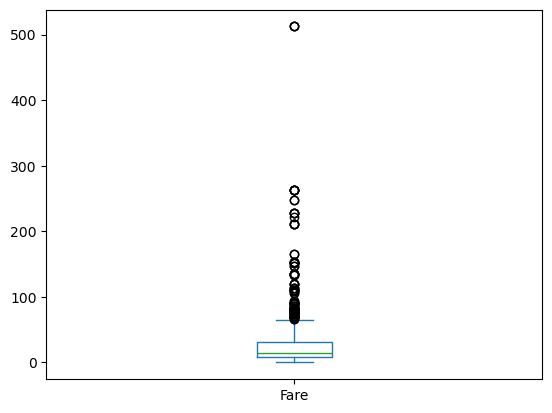

In [11]:
df["Fare"].plot(kind = "box")

### Varianza de edades

In [12]:
varianza = df["Age"].var()
print("La varianza de edades de los pasajeros del Titanic es de", varianza, "lo que nos da una gran dispersión de edades entre los pasajeros")

La varianza de edades de los pasajeros del Titanic es de 211.0191247463081 lo que nos da una gran dispersión de edades entre los pasajeros


In [13]:
range_inter1 = df["Age"].quantile(0.75) - df["Age"].quantile(0.25)

atipicos_menores1 = (df["Age"].quantile(0.25)) - range_inter1 * 1.5
atipicos_mayores1 = (df["Age"].quantile(0.75)) + range_inter1 * 1.5

edades_mayores = 0
for i in df["Age"]:
    if i > atipicos_mayores1:
        edades_mayores += 1

edades_menores = 0
for i in df["Age"]:
    if i < atipicos_menores1:
        edades_menores += 1

print("Abordaron", edades_menores, "personas con edades exageradamente menores")
print("Abordaron", edades_mayores, "personas con edades exageradamente mayores")

Abordaron 0 personas con edades exageradamente menores
Abordaron 11 personas con edades exageradamente mayores


<Axes: >

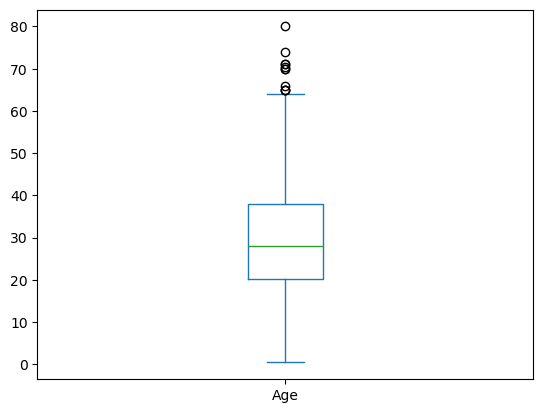

In [14]:
df["Age"].plot(kind = "box")

### Probabilidad de sobrevivir entre mujer de 40 y hombre de 70

In [15]:
H70 = df[(df["Sex"] == 'male') & (df['Age'] == 70)]
M40 = df[(df["Sex"] == 'female') & (df['Age'] == 40)]

meanH70 = H70["Survived"].mean()
meanM40 = M40["Survived"].mean()

print(meanH70)
print(meanM40)
print("La probabilidad de que una mujer de 40 años sobreviva es mayor a la de un hombre de 70 años")

0.0
0.8333333333333334
La probabilidad de que una mujer de 40 años sobreviva es mayor a la de un hombre de 70 años


In [16]:
"Es más probable "

'Es más probable '

### Distribución de edades con respecto a si sobrevivió o no el pasajero

In [17]:
df_edad = df[["Age", "Survived"]]
df_edad.head()

,Age,Survived
0,22.0,0
1,38.0,1
2,26.0,1
3,35.0,1
4,35.0,0


/Users/egmzvalerio/anaconda3/envs/iteso/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/egmzvalerio/anaconda3/envs/iteso/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


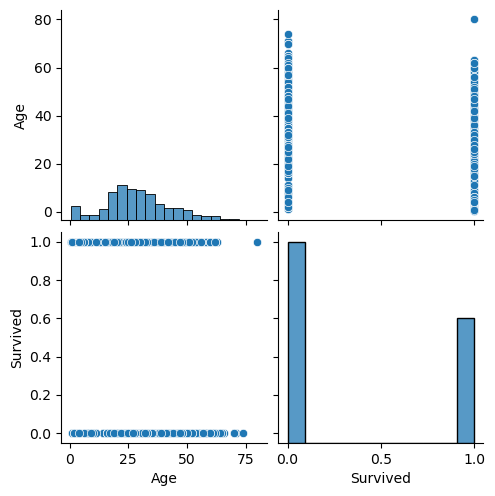

In [18]:
sns.pairplot(df_edad)

In [19]:
print("Podemos observar que en el suceso del Titanic fallecieron personas de todas las edades")

Podemos observar que en el suceso del Titanic fallecieron personas de todas las edades


### Distribución de sexo con respecto a si sobrevivió o no el pasajero

In [20]:
df_sexo = df[["Sex", "Survived"]]
df_sexo.head()

,Sex,Survived
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0


In [21]:
hombre = 0
mujer = 0

for i in df["Sex"]:
    if i == "female":
        mujer += 1
    else:
        hombre += 1

print("Al Titanic abordaron", mujer, "mujeres y", hombre, "hombres")

Al Titanic abordaron 314 mujeres y 577 hombres


/Users/egmzvalerio/anaconda3/envs/iteso/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


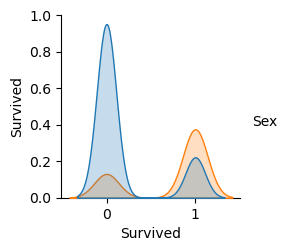

In [22]:
sns.pairplot(df_sexo, hue = "Sex")

In [23]:
print("Podemos observar que en el Titanic la mayor cantidad de fallecidos fueron hombres")
print("Podemos también observar que sobrevivieron más mujeres de las que fallecieron")

Podemos observar que en el Titanic la mayor cantidad de fallecidos fueron hombres
Podemos también observar que sobrevivieron más mujeres de las que fallecieron


In [24]:
HF = df[(df["Sex"] == 'male') & (df['Survived'] == 0)]
HF1 = HF['Survived'].count()
MF = df[(df["Sex"] == 'female') & (df['Survived'] == 0)]
MF1 = MF['Survived'].count()
HS = df[(df["Sex"] == 'male') & (df['Survived'] == 1)]
HS1 = HS['Survived'].count()
MS = df[(df["Sex"] == 'female') & (df['Survived'] == 1)]
MS1 = MS['Survived'].count()

print("En el Titanic fallecieron", HF1, "hombres y", MF1, "mujeres")
print("sobrevivieron", HS1, "hombres y", MS1, "mujeres")


En el Titanic fallecieron 468 hombres y 81 mujeres
sobrevivieron 109 hombres y 233 mujeres
